## Quick Start
In this section, we will walk through a few simple examples that can help you get started with **EzTao**. For more indepth tutorials, please check out the sections listed under Tutorials on the [main page](../index.rst) (or notebooks if you are running this in mybinder).

In [1]:
# general packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# packages/modules from eztao and celerite
import eztao
from eztao.carma import DRW_term
from eztao.ts import gpSimRand
from eztao.ts import drw_fit
from celerite import GP

# use eztao matplotlib style
mpl.rc_file(os.path.join(eztao.__path__[0], "viz/eztao.rc"))

##### Simulate a DRW process

In [2]:
# initialize a DRW kernel with a RMS amplitude of 0.2
# and a decorrelation/characteristic timescale of 100 days
amp = 0.2
tau = 100
DRW_kernel = DRW_term(np.log(amp), np.log(tau))

# simulate a process using the defined DRW kernel with a signal-to-noise of 10, 
# duraction of 10 years, 200 data points, and linear y-axis
t, y, yerr = gpSimRand(DRW_kernel, 10, 365*10, 200, log_flux=False)

Text(0.5, 1.0, 'Simulated DRW process')

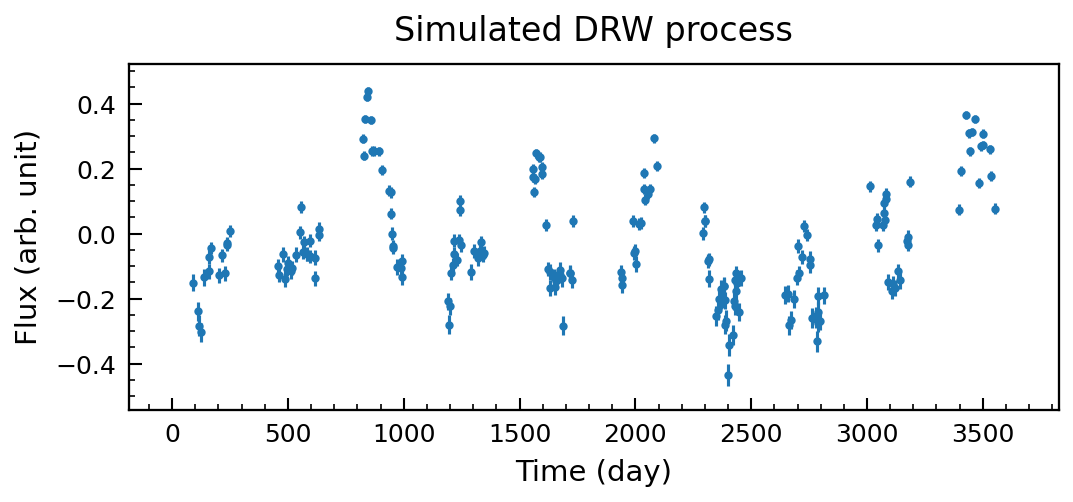

In [3]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=150, figsize=(8,3))
ax.errorbar(t, y, yerr, fmt='.')
ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DRW process')

##### Fit the simulated DRW process

In [4]:
best_fit = drw_fit(t, y, yerr)
print(f'Best-fit DRW parameter: {best_fit}')

Best-fit DRW parameter: [ 0.17356983 88.36262467]


##### Compare True PSD vs Best-fit PSD

In [5]:
# import PSD function from eztao
from eztao.carma import gp_psd

In [6]:
# define the true/best-fit PSD functions using the true kernel 
# and best-fit parameters
true_psd = gp_psd(DRW_kernel)
best_psd = gp_psd(DRW_term(*np.log(best_fit)))

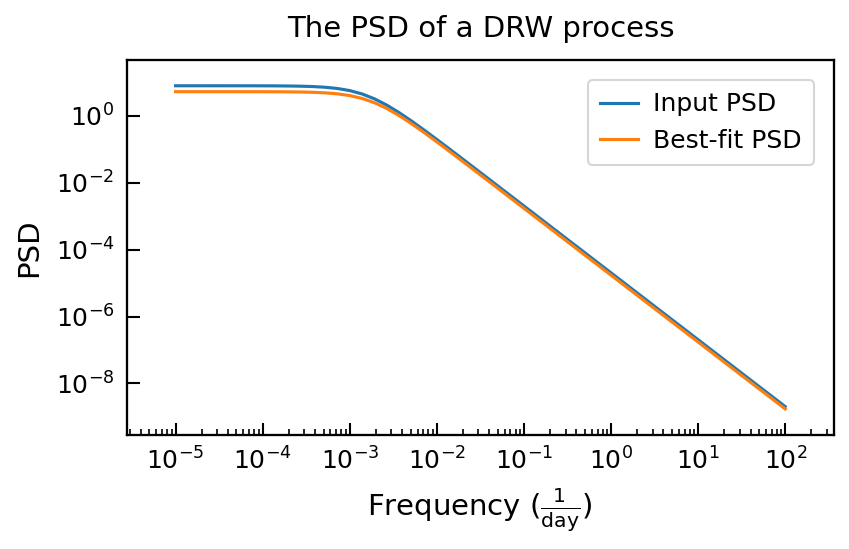

In [7]:
fig, ax = plt.subplots(1,1, dpi=150, figsize=(6,4))
freq = np.logspace(-5, 2)
ax.plot(freq, true_psd(freq), label='Input PSD')
ax.plot(freq, best_psd(freq), label='Best-fit PSD')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Frequency ($\frac{1}{\mathrm{day}}$)')
ax.set_ylabel('PSD')
ax.set_title('The PSD of a DRW process', fontsize=14)
ax.legend()
fig.tight_layout()

<div class="alert alert-info">

Note

Here, we are using a DRW model for demonstration purpose only, the same analysis can be applied using any CARMA models. We will show that in the next few notebooks.

</div>